In [140]:
#Import necessary package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [141]:
#import dataset
churn = pd.read_csv("ChurnData.csv")

In [142]:
churn.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [143]:
#show all column name
churn.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [144]:
#selecet target feature as x and y
#covert x into numpy array
x = np.asarray(churn.iloc[:, 0:27])

In [145]:
x

array([[11.   , 33.   ,  7.   , ...,  3.033,  4.913,  4.   ],
       [33.   , 33.   , 12.   , ...,  3.24 ,  3.497,  1.   ],
       [23.   , 30.   ,  9.   , ...,  3.24 ,  3.401,  3.   ],
       ...,
       [ 6.   , 32.   , 10.   , ...,  3.168,  3.85 ,  3.   ],
       [24.   , 30.   ,  0.   , ...,  3.866,  3.219,  4.   ],
       [61.   , 50.   , 16.   , ...,  3.24 ,  5.247,  2.   ]])

In [146]:
#select dependent variable and convert it as integer
#also convert it into numpy array 
y = np.asarray(churn.iloc[:, 27].astype(int))

In [147]:
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

### Data Preprocessing

In [148]:
from sklearn import preprocessing

In [149]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [150]:
x

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, ...,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , ...,  0.03858151,
        -0.73269992,  0.48758163],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.21827183,
        -0.13456666,  0.48758163],
       [-0.53296457, -0.85594447, -1.14970993, ...,  2.27177859,
        -0.97515038,  1.41630855],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  0.03858151,
         1.72644039, -0.44114529]])

In [151]:
#Devided data into train and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 45, test_size = .2)

In [152]:
x_train.shape

(160, 27)

In [153]:
x_test.shape

(40, 27)

In [154]:
y_test

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

### Modeling (Logistic Regression)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
# By using solver liblinear
LR = LogisticRegression(solver = "liblinear")

In [157]:
LR

LogisticRegression(solver='liblinear')

In [158]:
#Train the model
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [159]:
# Predict baised on the model

yhat = LR.predict(x_test)

In [160]:
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
#Accuracy score
LR.score(x_test, y_test)

0.725

In [177]:
## By using ‘saga’

LR_1 = LogisticRegression(C=0.01, solver = 'saga')

In [178]:
LR_1

LogisticRegression(C=0.01, solver='saga')

In [179]:
#train the model
LR_1.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='saga')

In [180]:
yhat_1 = LR_1.predict(x_test)

In [181]:
yhat_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
LR_1.score(x_test, y_test)

0.65

### Evaluation

In [196]:
#import necessary package
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report

In [184]:
#jaccard score solver liblinear

jaccard_score(y_test, yhat, pos_label = 0)

0.6944444444444444

In [185]:
#jaccard score for saga

jaccard_score(y_test, yhat_1, pos_label = 0)

0.65

In [186]:
#confusion matrix for liblinear

cm_liblinear = confusion_matrix(y_test, yhat)

In [187]:
cm_liblinear

array([[25,  1],
       [10,  4]])

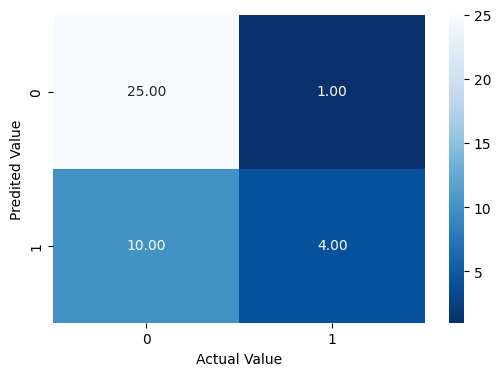

In [193]:
# displaying confusion matrix 

plt.figure(figsize = (6,4))
sns.heatmap(cm_liblinear, annot = True, fmt = ".2f", cmap = "Blues_r")
plt.xlabel("Actual Value")
plt.ylabel("Predited Value")
plt.show()

In [189]:
#confusion matrix for saga

cm_saga = confusion_matrix(y_test, yhat_1)

In [190]:
cm_saga

array([[26,  0],
       [14,  0]])

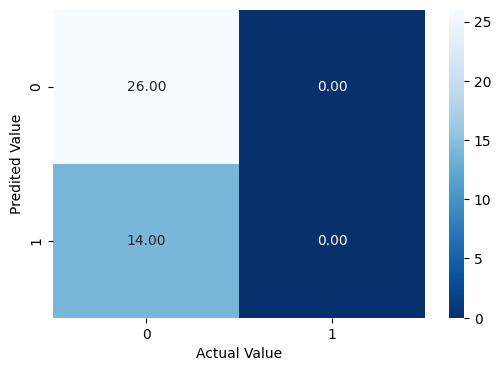

In [194]:
# displaying confusion matrix

plt.figure(figsize = (6,4))
sns.heatmap(cm_saga, annot = True, fmt = ".2f", cmap = "Blues_r")
plt.xlabel("Actual Value")
plt.ylabel("Predited Value")
plt.show()

In [198]:
# Classification Report for liblinear

cr = classification_report(y_test, yhat)

In [200]:
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82        26
           1       0.80      0.29      0.42        14

    accuracy                           0.73        40
   macro avg       0.76      0.62      0.62        40
weighted avg       0.74      0.72      0.68        40



In [202]:
#Classification Report for saga

print(classification_report(y_test, yhat_1, zero_division=1))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        26
           1       1.00      0.00      0.00        14

    accuracy                           0.65        40
   macro avg       0.82      0.50      0.39        40
weighted avg       0.77      0.65      0.51        40



### Conclution <br>

Here we see accuracy score for liblinear is 75% and saga is 65% .. In the confusion matrix we can see that saga can't predict any churn data .. <br>
we can conclud that Logistic regression (liblinear) model more fit for this data ,,,, 